#### **LSE Data Analytics Online Career Accelerator** 
#### Course 201: Data Analytics with Python

## Week 6: Assignment (Partial notebook)

The government employed an external consultant to assist with data analysis. However, the consultant resigned and left the project in a half-completed state. The government provided you with the partially completed Jupyter Notebook that was developed by the consultant. They asked you to evaluate and complete the Jupyter Notebook with Python code.

This activity will consist of two parts: (1) demonstrate the use of the functions provided, and (2) answer additional questions posed by the government. The questions are:

- What is the difference between qualitative and quantitative data? How can these be used in business predictions?
- Why is continuous improvement required? Can we not just implement the project and move on to other pressing matters?
- As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. Does that mean we can ignore data ethics?

In [6]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

### Question 1:

The consultant indicated that the function is functional, but did not demonstrate how to use it. Use the provided function, `plot_moving_average()`, to plot the data for the selected province (variable name is `sample_ci` and set the window parameter to 7 days. 

In [2]:
# Demonstrate the use of the function to plot moving averages

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

%matplotlib inline

## get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [19]:
# import csv file with pandas
ds1 = pd.read_csv('covid_19_uk_cases.csv', index_col=['Date'], parse_dates=['Date'])

# view DataFrame
print(ds1.shape)
ds1.head()

(7584, 11)


,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Deaths,Cases,Recovered,Hospitalised
Date,,,,,,,,,,,
2020-01-22,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0.0,0.0,0.0,0.0
2020-01-23,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0.0,0.0,0.0,0.0
2020-01-24,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0.0,0.0,0.0,0.0
2020-01-25,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0.0,0.0,0.0,0.0
2020-01-26,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,0.0,0.0,0.0,0.0


In [12]:
sample.dtypes

Province/State     object
Hospitalised      float64
dtype: object

In [20]:
sample = ds1[['Province/State','Hospitalised']].copy()

sample.head()

,Province/State,Hospitalised
Date,,
2020-01-22,Anguilla,0.0
2020-01-23,Anguilla,0.0
2020-01-24,Anguilla,0.0
2020-01-25,Anguilla,0.0
2020-01-26,Anguilla,0.0


In [21]:
# Select data for a specific province
sample_ci = sample[sample['Province/State'] == "Channel Islands"]

sample_ci.head()

,Province/State,Hospitalised
Date,,
2020-01-22,Channel Islands,0.0
2020-01-23,Channel Islands,0.0
2020-01-24,Channel Islands,0.0
2020-01-25,Channel Islands,0.0
2020-01-26,Channel Islands,0.0


<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Channel Islands')

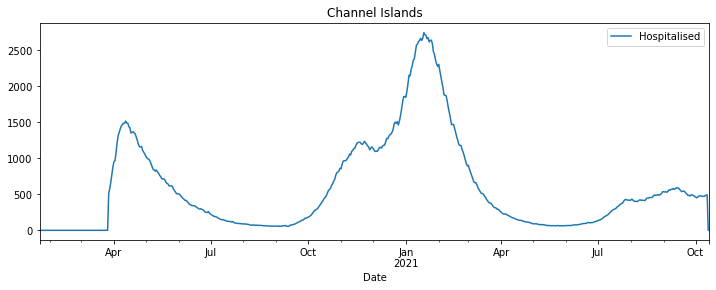

Province/State    0
Hospitalised      0
dtype: int64

In [22]:
# plot house prices as time-series
sample_ci.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Channel Islands')
plt.show(block=False);

# check for missing values
sample_ci.isna().sum()

In [23]:
sample_ci['SMA_7'] = sample_ci.iloc[:, 1].rolling(window=7).mean()

print(sample_ci.head(12))

             Province/State  Hospitalised  SMA_7
Date                                            
2020-01-22  Channel Islands           0.0    NaN
2020-01-23  Channel Islands           0.0    NaN
2020-01-24  Channel Islands           0.0    NaN
2020-01-25  Channel Islands           0.0    NaN
2020-01-26  Channel Islands           0.0    NaN
2020-01-27  Channel Islands           0.0    NaN
2020-01-28  Channel Islands           0.0    0.0
2020-01-29  Channel Islands           0.0    0.0
2020-01-30  Channel Islands           0.0    0.0
2020-01-31  Channel Islands           0.0    0.0
2020-02-01  Channel Islands           0.0    0.0
2020-02-02  Channel Islands           0.0    0.0


C:\Users\Miffy\AppData\Local\Temp/ipykernel_7452/1936786148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_ci['SMA_7'] = sample_ci.iloc[:, 1].rolling(window=7).mean()


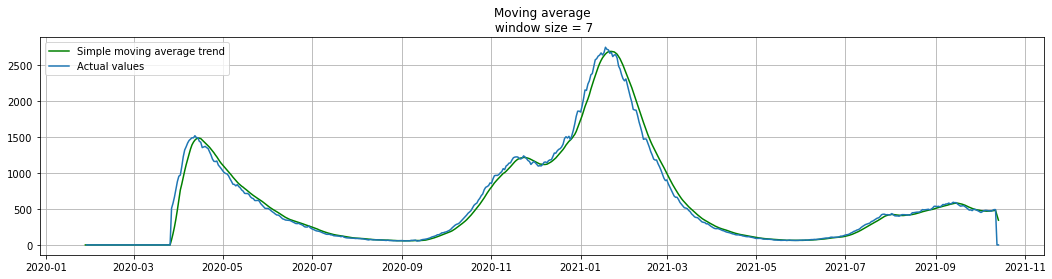

In [28]:
plot_moving_average(sample_ci.Hospitalised, 7)

In [34]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above. 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe.
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="best")
    plt.grid(True)

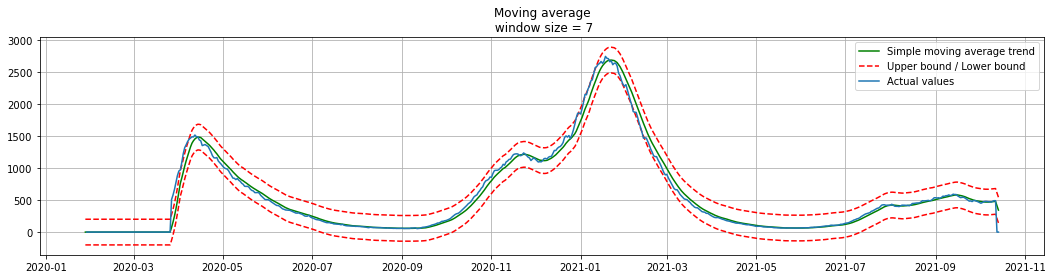

In [35]:
plot_moving_average(sample_ci.Hospitalised, 7, plot_intervals=True)

### Should setting the Date column as the index a must????

### Question 2:

The consultant performed a calculation that looks interesting, but the team is unsure about what the intention was and how to interpret the output. Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?

In [36]:
# Return top three days with biggest difference between daily value and rolling 7-day mean
s = sample_ci.copy()
s_rolling = s['Hospitalised'].rolling(window=7).mean()
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])
s.sort_values('error', ascending=False).head(3)

,Province/State,Hospitalised,SMA_7,error
Date,,,,
2020-01-22,Channel Islands,0.0,NaN,45.2512
2021-03-21,Channel Islands,381.0,436.857143,45.2512
2021-03-14,Channel Islands,512.0,574.285714,45.2512


Province/State	Date	Hospitalised	error
2593	Channel Islands	2020-03-27	509.0	436.285714
2594	Channel Islands	2020-03-28	579.0	423.571429
2595	Channel Islands	2020-03-29	667.0	416.285714

### Question 3:

The management team had some additional questions around the project where they asked for additional feedback to be included in your final presentation. Make sure to answer the questions in the notebook in markdown format in preparation for your presentation. They expectation is that you will provide short and direct responses to help them understand the importance and impact of the questions below.

> ***Note:*** You can double-click on the markdown cells to edit the text.

#### Question 3.1 (double click cell to edit)
- What is the difference between qualitative and quantitative data and how can this be used in predictions?

YOUR ANSWER HERE.

#### Question 3.2 (double click cell to edit)
- Can you provide you observations around why continuous improvement is required, can we not just implement the project and move on to other pressing matters?

YOUR ANSWER HERE.

#### Question 3.2 (double click cell to edit)
- We adhere to all data protection requirements and have good governance in place. Does that mean we can ignore data ethics. We only work with aggregated data and therefore will not expose any personal details? (is it different, example of how it could apply to this case; two or three sentences max)

YOUR ANSWER HERE.